<center><h3>Name: Soumya Basu</h3></center>
<center><h3>Reg No.:23MDT0047</h3></center>

### Q1.  Perform the multivariate regression analysis for the following data.

##### Data

In [1]:
import pandas as pd

# Data for the columns
data = {
    "Charge rate (amps)": [0.375, 1.000, 1.000, 1.000, 1.625, 1.625, 1.625, 0.375, 1.000, 1.000, 1.000, 1.625, 0.375, 1.000, 1.000, 1.625, 0.375, 0.375],
    "Discharge rate (amps)": [3.13, 3.13, 3.13, 3.13, 3.13, 3.13, 3.13, 5.00, 5.00, 5.00, 5.00, 5.00, 1.25, 1.25, 1.25, 1.25, 3.13, 3.13],
    "Depth of discharge (% of rated ampere-hours)": [60.0, 76.8, 60.0, 60.0, 43.2, 60.0, 60.0, 76.8, 43.2, 43.2, 100.0, 76.8, 76.8, 43.2, 76.8, 60.0, 76.8, 60.0],
    "Temperature (°C)": [40, 30, 20, 20, 10, 20, 20, 10, 10, 30, 20, 10, 10, 10, 30, 0, 30, 20],
    "End of charge voltage (volts)": [2.00, 1.99, 2.00, 1.98, 2.01, 2.00, 2.02, 2.01, 1.99, 2.01, 2.00, 1.99, 2.01, 1.99, 2.00, 2.00, 1.99, 2.00],
    "Cycles to failure": [101, 141, 96, 125, 43, 16, 188, 10, 3, 386, 45, 2, 76, 78, 160, 3, 314, 170]
}

# Creating the DataFrame
df = pd.DataFrame(data)

In [ ]:
df.head()
#df.to_excel("battery_failure.xlsx")

##### Correlation_matrix

In [8]:
# Assuming df is your DataFrame
# Compute the correlation matrix and fill NaN values
correlation_matrix = df.corr()
# Display the correlation matrix
correlation_matrix 

,Charge rate (amps),Discharge rate (amps),Depth of discharge (% of rated ampere-hours),Temperature (°C),End of charge voltage (volts),Cycles to failure
Charge rate (amps),1.000000e+00,1.377587e-17,-0.248259,-0.375000,0.076822,-0.299514
Discharge rate (amps),1.377587e-17,1.000000e+00,0.099274,0.088972,0.004405,0.015763
Depth of discharge (% of rated ampere-hours),-2.482591e-01,9.927368e-02,1.000000,0.154341,-0.048100,-0.104209
Temperature (°C),-3.750000e-01,8.897242e-02,0.154341,1.000000,-0.064018,0.644658
End of charge voltage (volts),7.682213e-02,4.405051e-03,-0.048100,-0.064018,1.000000,0.116267
Cycles to failure,-2.995138e-01,1.576330e-02,-0.104209,0.644658,0.116267,1.000000


<Axes: >

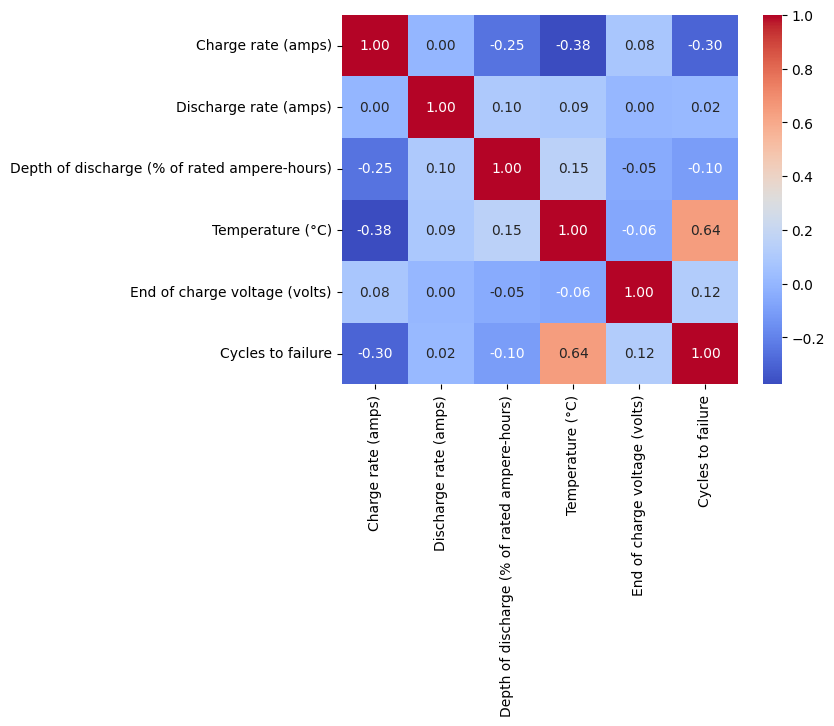

In [9]:
import seaborn as sns
# Calculate correlation matrix

# If you want to visualize this correlation matrix, you can use seaborn's heatmap function:
sns.heatmap(correlation_matrix, fmt='.2f', annot=True, cmap='coolwarm')

##### Variance_Inflation_Factor

In [15]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables (X)
X = df[["Charge rate (amps)", "Discharge rate (amps)", "Depth of discharge (% of rated ampere-hours)",
        "Temperature (°C)", "End of charge voltage (volts)"]]

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


                                        Feature           VIF
0                                         const  42883.214410
1                            Charge rate (amps)      1.222952
2                         Discharge rate (amps)      1.018925
3  Depth of discharge (% of rated ampere-hours)      1.081623
4                              Temperature (°C)      1.180163
5                 End of charge voltage (volts)      1.008282


##### Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:

# Assuming df is the DataFrame from previous step

# Independent variables (features)
X = df[["Charge rate (amps)", "Discharge rate (amps)", "Depth of discharge (% of rated ampere-hours)",
        "Temperature (°C)", "End of charge voltage (volts)"]]

# Dependent variable (target)
y = df["Cycles to failure"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [6]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Optionally, display the predicted vs actual values for further analysis
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Intercept: -2000.238476274965
Coefficients: [-3.35899606e+01  9.57503356e-01 -2.66997419e+00  1.03784845e+01
  1.07376404e+03]
Mean Squared Error (MSE): 28739.803022168016
R-squared (R2): -7.632677799663737
   Actual   Predicted
0     101  392.631284
1     141  212.259506
8       3   96.191479
5      16  143.074142


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by principal components:", pca.explained_variance_ratio_)


Explained variance by principal components: [0.31373596 0.20444865]


##### Ridge and Lasso

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ridge regression
ridge = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso regression
lasso = Lasso(alpha=0.1)  # Regularization strength (alpha)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Compute Metrics for Ridge
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Compute Metrics for Lasso
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Print metrics for Ridge
print("Ridge Regression Metrics:")
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"Mean Absolute Error (MAE): {ridge_mae:.2f}")
print(f"R-squared (R²): {ridge_r2:.2f}")

# Print metrics for Lasso
print("\nLasso Regression Metrics:")
print(f"Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"Mean Absolute Error (MAE): {lasso_mae:.2f}")
print(f"R-squared (R²): {lasso_r2:.2f}")


Ridge Regression Metrics:
Mean Squared Error (MSE): 29718.62
Mean Absolute Error (MAE): 152.71
R-squared (R²): -7.93

Lasso Regression Metrics:
Mean Squared Error (MSE): 29703.75
Mean Absolute Error (MAE): 151.58
R-squared (R²): -7.92
